# CONSOLIDATE DatePrep

In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:

DEBUG = True
seed = 1919


In [6]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [7]:
# Import the Base Dataset
base_dataset_name = 'dataset_base_2022-11-27.csv'

df_base_raw = pd.read_csv(f'{fileloc}/{base_dataset_name}')

print(df_base_raw.shape)
print()
print(df_base_raw.columns.values.tolist())


(536782, 22)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos']


In [8]:

print(pd.DataFrame(df_base_raw.isna().sum()).transpose())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  x_num_dogs  position  y_margin  Winner_actual  Top3_actual  position_random  Winner_random  \
0        0        0          0       0         0         0          0      0         0      0           0         0         0              0            0                0              0   

   Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  y_pos  
0            0                   0                0              0      0  


In [9]:
# Import the Speed Profile

speed_profile_name = 'dataprep_speed_profile_2022-11-27.csv'

df_speed_profile = pd.read_csv(f'{fileloc}/{speed_profile_name}')

print(df_speed_profile.shape)
print()
print(df_speed_profile.columns.values.tolist())
print()


(536782, 19)

['@id_DOG', '@id_RACE', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist']



In [10]:

print(pd.DataFrame(df_speed_profile.isna().sum()).transpose())


   @id_DOG  @id_RACE  x_races_tot  x_dist_gp  x_runtm_gp  x_rtgp_prev  x_rtgp_avg  x_rtgp_min  x_rtgp_max  x_rtgp_range  x_rtgp_std  x_no_prev_races  x_speed_prev  x_speed_avg  x_speed_min  \
0        0         0            0          0           0            0           0           0           0             0           0                0             0            0            0   

   x_speed_max  x_speed_range  x_speed_std  x_no_prev_r_in_dist  
0            0              0            0                    0  


In [11]:

# Import the Race Profile
race_profile_name = 'dataprep_raceprofile_2022-11-27.csv'

df_race_profile = pd.read_csv(f'{fileloc}/{race_profile_name}')

print(df_race_profile.shape)
print()
print(df_race_profile.columns.values.tolist())


(536782, 16)

['@id_DOG', '@id_RACE', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1']


In [30]:

print(pd.DataFrame(df_race_profile.isna().sum()).transpose())


   @id_DOG  @id_RACE  G5  G4  G3  G2  G1  Gmix  Gmas  Gmai  Gh  Gres  Gnov  Gsp  Gfin  RaceGrade_H1
0        0         0   0   0   0   0   0     0     0     0   0     0     0    0     0             0


In [12]:

# Import the Race Profile
dateprep_categorical = 'dataprep_categorical_2022-11-27.csv'

df_categorical = pd.read_csv(f'{fileloc}/{dateprep_categorical}')

print(df_categorical.shape)
print()
print(df_categorical.columns.values.tolist())


(536782, 13)

['@id_DOG', 'DogName', '@id_RACE', 'RaceName', 'Distance', 'x_dist_gp', 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700']


In [31]:

print(pd.DataFrame(df_categorical.isna().sum()).transpose())


   @id_DOG  DogName  @id_RACE  RaceName  Distance  x_dist_gp  dist300  dist350  dist400  dist450  dist500  dist600  dist700
0        0        0         0        15         0          0        0        0        0        0        0        0        0


In [13]:

# Import the Performance Dataset
dateprep_perf = 'dataprep_performance_2022-11-27.csv'

df_perf = pd.read_csv(f'{fileloc}/{dateprep_perf}')

print(df_perf.shape)
print()
print(df_perf.columns.values.tolist())


(536782, 9)

['@id_DOG', '@id_RACE', 'xr_races', 'xr_wins', 'xr_wins_pct', 'xr_fin_t2', 'xr_fin_t2_pct', 'xr_fin_plc', 'xr_fin_plc_pct']


In [32]:

print(pd.DataFrame(df_perf.isna().sum()).transpose())


   @id_DOG  @id_RACE  xr_races  xr_wins  xr_wins_pct  xr_fin_t2  xr_fin_t2_pct  xr_fin_plc  xr_fin_plc_pct
0        0         0         0        0            0          0              0           0               0


In [14]:

# Merge the datasets together
print(df_base_raw.shape)
print(df_speed_profile.shape)
print(df_race_profile.shape)

print()
print()

df_base0 = pd.merge( df_base_raw, df_speed_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base0.shape)
print(df_base0.columns.values.tolist())

print()
print()
df_base1 = pd.merge( df_base0, df_race_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base1.shape)
print(df_base1.columns.values.tolist())

print()
print()
df_base2 = pd.merge( df_base1, df_categorical.drop(columns = ['DogName','Distance','x_dist_gp']), on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base2.shape)
print(df_base2.columns.values.tolist())

print()
print()
df_base = pd.merge( df_base2, df_perf, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base.shape)
print(df_base.columns.values.tolist())

del df_base0, df_base1, df_base2


(536782, 22)
(536782, 19)
(536782, 16)


(536782, 39)
['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist']


(536782, 53)
['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_

### Normalising the x_speed_prev in Each RaceId

In [15]:

"""
NOTE:
    When mean is 0 created flag - No Prev Races
    When std is 0 create flag - No Std
    
Q Sau takke ka sawaal ? 
    Missing Norm values be replaced with 0 or 0.5.
        Currently used 0.5    

print(datetime.now())

ds_norm = df_base1.groupby('@id_RACE')['x_speed_prev'].agg( ['mean','std'] ).reset_index().rename(columns = {'mean':'x_speed_prev_mean', 'std':'x_speed_prev_std'} )

df_base1 = df_base1.merge( ds_norm , on = '@id_RACE' )
df_base1['x_no_speed_prev_std'] = df_base1['x_speed_prev_std'].apply(lambda x : 1 if x == 0 else 0 )

df_base1['x_speed_prev_norm'] = (df_base1['x_speed_prev'] - df_base1['x_speed_prev_mean']) / df_base1['x_speed_prev_std']
df_base1['x_speed_prev_norm'] = df_base1.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1) 
#df_base1['x_speed_prev_norm'] = df_base1['x_speed_prev_norm'].fillna(0.5)

"""

print(datetime.now())


2022-11-27 11:31:33.140032


In [16]:

# QC the Transformation
print(pd.DataFrame(df_base.isna().sum()).transpose())
qc_missing = pd.DataFrame(df_base.isna().sum())
#qc_missing.to_csv()
qc_missing.to_csv(f'{fileloc}/missing.csv', index = False)

#df_base2.groupby('x_no_prev_races')['x_speed_prev_std'].isna().sum()
#df_base2.groupby('x_no_prev_races')[['x_speed_prev_mean', 'x_speed_prev_std']].apply(lambda x: x.isna().sum())
#df_base1.groupby(['x_no_prev_races','x_no_speed_prev_std'])[['x_speed_prev_mean', 'x_speed_prev_std']].apply(lambda x: x.eq(0).sum())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  x_num_dogs  position  y_margin  Winner_actual  Top3_actual  position_random  Winner_random  \
0        0        0          0       0         0         0          0      0         0      0           0         0         0              0            0                0              0   

   Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  y_pos  x_races_tot  x_dist_gp  x_runtm_gp  ...  G1  Gmix  Gmas  Gmai  Gh  Gres  Gnov  Gsp  Gfin  RaceGrade_H1  RaceName  dist300  \
0            0                   0                0              0      0            0          0           0  ...   0     0     0     0   0     0     0    0     0             0        15        0   

   dist350  dist400  dist450  dist500  dist600  dist700  xr_races  xr_wins  xr_wins_pct  xr_fin_t2  xr_fin_t2_pct  xr_fin_plc  xr_fin_plc_pct  
0        0        0        0        0        0        0         0        0  

In [17]:

print(df_base.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700', 'xr_races', 'xr_wins', 'xr_wins_pct', 'xr_fin_t2', 'xr_fin_t2_pct', 'xr_fin_plc', 'xr_fin_plc_pct']


In [18]:

#df_base1['x_rtgp_prev'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_avg'].plot( kind='density', legend=True, figsize = (24,8) )


In [19]:

# Normalising multiple columns in loop

print(datetime.now())

cols_to_norm = ['xr_races' \
                , 'x_speed_prev' ,'x_speed_avg' ,'x_speed_min' ,'x_speed_max' ,'x_speed_range'\
                , 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range'\
                , 'xr_wins', 'xr_wins_pct', 'xr_fin_t2', 'xr_fin_t2_pct', 'xr_fin_plc', 'xr_fin_plc_pct']

for curr_col in cols_to_norm:
    
    mean_name = curr_col + '_mean'
    std_name = curr_col + '_std'
    no_std_name = curr_col + '_std' + '_no'
    norm_name = curr_col + '_norm'
    
    print(mean_name, std_name, norm_name)

    ds_norm = df_base.groupby('@id_RACE')[curr_col].agg(['mean','std']).reset_index().rename(columns = {'mean':mean_name, 'std':std_name})

    df_base = df_base.merge(ds_norm , on = '@id_RACE')
    df_base[no_std_name] = df_base[std_name].apply(lambda x : 1 if x == 0 else 0)

    #df_base[norm_name] = (df_base[curr_col] - df_base[mean_name]) / df_base[std_name]
    #df_base['x_speed_prev_norm'] = df_base.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1)
    df_base[norm_name] = df_base.apply(lambda x : 0 if (x[mean_name] == 0) | (x[std_name] == 0) | (pd.isna(x[std_name])) else ( x[curr_col] - x[mean_name] ) / x[std_name], axis = 1)
    #df_base[norm_name] = df_base[norm_name].fillna(0.5)
    
    df_base.drop(columns = [mean_name, std_name, no_std_name], inplace = True)
    
    del ds_norm, mean_name, std_name, no_std_name, norm_name

print(datetime.now())


2022-11-27 11:31:36.343243
xr_races_mean xr_races_std xr_races_norm
x_speed_prev_mean x_speed_prev_std x_speed_prev_norm
x_speed_avg_mean x_speed_avg_std x_speed_avg_norm
x_speed_min_mean x_speed_min_std x_speed_min_norm
x_speed_max_mean x_speed_max_std x_speed_max_norm
x_speed_range_mean x_speed_range_std x_speed_range_norm
x_rtgp_prev_mean x_rtgp_prev_std x_rtgp_prev_norm
x_rtgp_avg_mean x_rtgp_avg_std x_rtgp_avg_norm
x_rtgp_min_mean x_rtgp_min_std x_rtgp_min_norm
x_rtgp_max_mean x_rtgp_max_std x_rtgp_max_norm
x_rtgp_range_mean x_rtgp_range_std x_rtgp_range_norm
xr_wins_mean xr_wins_std xr_wins_norm
xr_wins_pct_mean xr_wins_pct_std xr_wins_pct_norm
xr_fin_t2_mean xr_fin_t2_std xr_fin_t2_norm
xr_fin_t2_pct_mean xr_fin_t2_pct_std xr_fin_t2_pct_norm
xr_fin_plc_mean xr_fin_plc_std xr_fin_plc_norm
xr_fin_plc_pct_mean xr_fin_plc_pct_std xr_fin_plc_pct_norm
2022-11-27 11:35:15.989818


In [20]:

print(df_base.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700', 'xr_races', 'xr_wins', 'xr_wins_pct', 'xr_fin_t2', 'xr_fin_t2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_races_norm', 'x_speed_prev_norm', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_speed_max_norm', 'x_speed_range_norm', 'x_rtgp_prev_norm',

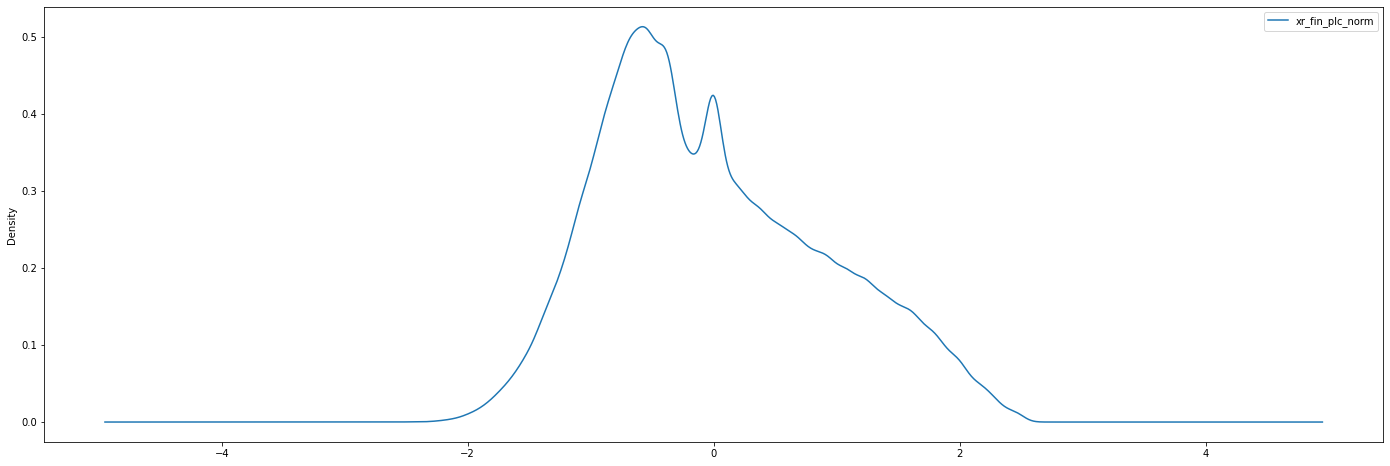

In [33]:

#df_base['x_races_tot_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_avg_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_max_norm'].plot( kind='density', legend=True, figsize = (24,8) )

#df_base['y_margin'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['xr_wins_pct_norm'].plot( kind='density', legend=True, figsize = (24,8) )
df_base['xr_fin_plc_norm'].plot( kind='density', legend=True, figsize = (24,8) )


In [22]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random']

cols_for_drop = []

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'modeling_base_{todaydt}.csv'

exp_ds = df_base.drop(columns = cols_for_drop)


In [23]:

print(pd.DataFrame(exp_ds.isna().sum()).transpose())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  x_num_dogs  position  y_margin  Winner_actual  Top3_actual  position_random  Winner_random  \
0        0        0          0       0         0         0          0      0         0      0           0         0         0              0            0                0              0   

   Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  y_pos  x_races_tot  x_dist_gp  x_runtm_gp  ...  dist700  xr_races  xr_wins  xr_wins_pct  xr_fin_t2  xr_fin_t2_pct  xr_fin_plc  \
0            0                   0                0              0      0            0          0           0  ...        0         0        0            0          0              0           0   

   xr_fin_plc_pct  xr_races_norm  x_speed_prev_norm  x_speed_avg_norm  x_speed_min_norm  x_speed_max_norm  x_speed_range_norm  x_rtgp_prev_norm  x_rtgp_avg_norm  x_rtgp_min_norm  x_rtgp_max_norm  \
0               0           

In [24]:

print(exp_ds.shape)


(536782, 85)


In [25]:

print(exp_ds.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700', 'xr_races', 'xr_wins', 'xr_wins_pct', 'xr_fin_t2', 'xr_fin_t2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_races_norm', 'x_speed_prev_norm', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_speed_max_norm', 'x_speed_range_norm', 'x_rtgp_prev_norm',

In [26]:

exp_ds.tail(15)


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_races_tot,x_dist_gp,x_runtm_gp,...,dist700,xr_races,xr_wins,xr_wins_pct,xr_fin_t2,xr_fin_t2_pct,xr_fin_plc,xr_fin_plc_pct,xr_races_norm,x_speed_prev_norm,x_speed_avg_norm,x_speed_min_norm,x_speed_max_norm,x_speed_range_norm,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm,xr_wins_norm,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm
536767,667700820,DARK PATCH,24.70,824847265,824847265,400m,Maiden,Gawler,2022-09-23,14.00,6,6,18.00,0,0,1.0,1,1,4.0,0,0,6,0,400,24.700000,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500000,-0.645481,-0.645395,-0.645308,-0.645481,-0.409289,4.160988e-14,-1.628213e-14,4.160988e-14,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
536768,679093488,BREE FURY,24.31,824847265,824847265,400m,Maiden,Gawler,2022-09-23,26.00,6,5,12.25,0,0,3.0,0,1,5.0,0,0,5,0,400,24.310000,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500000,-0.645481,-0.645395,-0.645308,-0.645481,-0.409289,4.160988e-14,-1.628213e-14,4.160988e-14,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
536769,702435590,SPRINGVALE CHIP,24.10,824847265,824847265,400m,Maiden,Gawler,2022-09-23,2.90,6,3,9.25,0,1,4.0,0,0,2.0,0,1,3,1,400,24.100000,...,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.302122,1.318951,1.328911,1.302122,-0.404080,-1.581139e+00,-1.581139e+00,-1.581139e+00,-1.581139e+00,-1.581139,0.0,0.0,0.000000,0.000000,0.000000,0.000000
536770,692849434,CADILLAC SEDAN,18.50,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,6.50,6,4,8.25,0,0,6.0,0,0,4.0,0,0,4,0,300,18.196721,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.645497,-0.645447,-0.645447,-0.645447,-0.645447,-0.645497,-3.087003e-14,-3.087003e-14,-3.087003e-14,-3.087003e-14,0.000000,0.0,0.0,-0.408248,-0.408248,-0.408248,-0.408248
536771,692849435,CADILLAC STAR,17.93,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,2.70,6,1,0.00,1,1,1.0,1,1,1.0,1,1,1,1,300,17.636066,...,0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.290994,1.310701,1.310701,1.310701,1.310701,1.290994,-1.581139e+00,-1.581139e+00,-1.581139e+00,-1.581139e+00,0.000000,0.0,0.0,2.041241,2.041241,2.041241,2.041241
536772,692849436,CADILLAC COUPE,18.50,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,7.50,6,5,8.25,0,0,4.0,0,0,5.0,0,0,5,0,300,18.196721,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.645497,-0.645447,-0.645447,-0.645447,-0.645447,-0.645497,-3.087003e-14,-3.087003e-14,-3.087003e-14,-3.087003e-14,0.000000,0.0,0.0,-0.408248,-0.408248,-0.408248,-0.408248
536773,692849437,CADILLAC LLOYD,18.24,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,5.00,6,2,4.25,0,1,2.0,0,1,3.0,0,1,2,0,300,17.940984,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.645497,-0.645447,-0.645447,-0.645447,-0.645447,-0.645497,-3.087003e-14,-3.087003e-14,-3.087003e-14,-3.087003e-14,0.000000,0.0,0.0,-0.408248,-0.408248,-0.408248,-0.408248
536774,692849438,CADILLAC MAGIC,18.69,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,12.00,6,6,10.75,0,0,5.0,0,0,6.0,0,0,6,1,300,18.383607,...,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.290994,1.271085,1.271085,1.271085,1.271085,1.290994,1.581139e+00,1.581139e+00,1.581139e+00,1.581139e+00,0.000000,0.0,0.0,-0.408248,-0.408248,-0.408248,-0.408248
536775,695984743,COMPTON BUSTER,18.38,824845033,824845033,305m,Maiden,Mount Gambier,2022-09-18,3.70,6,3,6.25,0,1,3.0,0,1,2.0,0,1,3,0,300,18.078689,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.645497,-0.645447,-0.645447,-0.645447,-0.645447,-0.645497,-3.087003e-14,-3.087003e-14,-3.087003e-14,-3.087003e-14,0.000000,0.0,0.0,-0.408248,-0.408248,-0.408248,-0.408248
536776,1478450063,PIXI LIMEBURNER,16.35,626240615,626240615,272m,Non Graded,The Gardens,2021-01-02,4.20,6,3,6.75,0,1,6.0,0,0,3.0,0,1,3,0,300,18.033088,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00

In [27]:

exp_ds.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,ft_sp,x_num_dogs,position,y_margin,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_races_tot,x_dist_gp,x_runtm_gp,x_rtgp_prev,x_rtgp_avg,x_rtgp_min,x_rtgp_max,x_rtgp_range,...,dist700,xr_races,xr_wins,xr_wins_pct,xr_fin_t2,xr_fin_t2_pct,xr_fin_plc,xr_fin_plc_pct,xr_races_norm,x_speed_prev_norm,x_speed_avg_norm,x_speed_min_norm,x_speed_max_norm,x_speed_range_norm,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm,xr_wins_norm,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm
count,5.367820e+05,536782.000000,5.367820e+05,5.367820e+05,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,...,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,536782.000000,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05,5.367820e+05
mean,4.526384e+08,24.401001,7.292602e+08,7.292602e+08,16.991305,7.336054,4.166000,6.029310,0.139014,0.416661,4.168027,0.138749,0.416247,4.028419,0.144332,0.434445,4.166000,17.441984,415.650767,24.331163,24.057037,24.026348,23.691691,24.470661,0.778971,...,0.009917,17.441984,2.639358,0.150814,5.287484,0.293287,6.638280,0.364847,1.265796e-19,3.238245e-17,-7.796228e-18,4.204800e-17,1.456009e-16,2.484228e-18,1.036174e-16,-1.403604e-07,-8.938350e-18,-2.441664e-17,1.172309e-18,4.167613e-19,6.561249e-18,7.840903e-19,8.113297e-18,4.399261e-19,7.676473e-18
std,1.120535e+08,4.949724,5.833205e+07,5.833205e+07,21.039273,0.896384,2.160989,5.037514,0.345961,0.493006,2.160860,0.345685,0.492936,2.089659,0.351427,0.495684,2.160989,15.125087,77.953580,4.640764,5.226176,4.902033,4.862822,4.974698,0.694263,...,0.099087,15.125087,3.092784,0.164388,5.404095,0.219539,6.516819,0.237093,9.244689e-01,9.248195e-01,9.248195e-01,9.248195e-01,9.248195e-01,9.245404e-01,9.186510e-01,9.219739e-01,9.219667e-01,9.219667e-01,9.171582e-01,8.466958e-01,8.537775e-01,9.181651e-01,9.182514e-01,9.210287e-01,9.210772e-01
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.260000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,300.000000,9.950249,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.474874e+00,-2.474803e+00,-2.474828e+00,-2.474788e+00,-2.474848e+00,-2.474874e+00,-2.461040e+00,-2.474590e+00,-2.473946e+00,-2.473594e+00,-2.441584e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00
25%,3.836043e+08,20.540000,6.801957e+08,6.801957e+08,4.200000,7.000000,2.000000,1.990000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,5.000000,350.000000,20.735650,20.619335,20.664857,20.404899,21.095455,0.351852,...,0.000000,5.000000,0.000000,0.000000,1.000000,0.142857,2.000000,0.208333,-7.128324e-01,-6.641927e-01,-6.718327e-01,-6.229789e-01,-6.772973e-01,-6.784502e-01,-6.288299e-01,-6.129837e-01,-6.165367e-01,-6.233181e-01,-6.392977e-01,-5.855400e-01,-5.976143e-01,-6.822210e-01,-6.638927e-01,-7.001945e-01,-6.822210e-01
50%,4.517679e+08,23.530000,7.290297e+08,7.290297e+08,8.800000,8.000000,4.000000,5.250000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,14.000000,400.000000,23.700000,23.659794,23.592500,23.250302,24.111392,0.729114,...,0.000000,14.000000,2.000000,0.117647,4.000000,0.275862,5.000000,0.357143,-1.026751e-01,1.042167e-01,5.992582e-02,1.635671e-01,4.893348e-02,-1.132179e-01,0.000000e+00,0.000000e+00,

In [28]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)

print(datetime.now())


2022-11-27 11:37:49.755825


In [29]:

print("THE END")


THE END
